## Statistical Analysis of Astrocytes in MVG, VLVG and FibrinVLVG hydrogels

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mode
import copy
import glob
import os
import Graphics
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [2]:
# Set colors
palette = Graphics.palette()
bars_palette = sns.color_palette('crest')

## Define base colors for cool sage, soft gold, and coral rose
cool_sage = "#9CAF88"
soft_gold = "#D4AF37"
coral_rose = "#E76F51"
## Create an expanded palette using Seaborn's blend_palette for smooth gradients
markers_palette = sns.color_palette(sns.blend_palette([cool_sage, soft_gold, coral_rose], n_colors=3))

### Load Annotation CSV

Samples from 3 different biological replaicates (N2, N4 and N6) were imaged in LST700 confocal microscope and annotated using the nuclei segmentation model and the BBValidator tool. The annotation classified astrocytes into 2 types: SOX9+, GFAP+, and accorading to their morphology: Round, Branched, hBranched and Clusters.

In [3]:
# .csv Path with Fiji annotations
annotation_path = "/Users/Beatriz/Documents/Biomédica@IST/Mestrado/Tese/datasets_segmentation/E1WT7DIV__GFAP_SOX9_GFP_DAPI/24-09-16_annotations.csv"

# Path of the images used for annotation
images_path = "/Users/Beatriz/Documents/Biomédica@IST/Mestrado/Tese/datasets_segmentation/E1WT7DIV__GFAP_SOX9_GFP_DAPI/originals"
images_names = [os.path.basename(img_path).split('.')[0] for img_path in glob.glob(f"{images_path}/*")]

# Import .csv file with cell instance labels
df_annotations = pd.read_csv(annotation_path) 
df_filtered = df_annotations[df_annotations["File Name"].isin(images_names)]
df = df_filtered.loc[:, ["File Name", "Segmentation Number", "Morphology Label", "SOX9 Label", "GFP Label", "GFAP Label"]].drop_duplicates()

# Show dataframe
df

,File Name,Segmentation Number,Morphology Label,SOX9 Label,GFP Label,GFAP Label
11073,E1 ActinGFP 8DIV N6 VLVG P1,3,Round,Positive,Positive,Positive
11074,E1 ActinGFP 8DIV N6 VLVG P1,8,Round,Positive,Positive,Positive
11075,E1 ActinGFP 8DIV N6 VLVG P1,13,Round,Positive,Positive,Positive
11081,E1 ActinGFP 8DIV N6 VLVG P1,9,Round,Positive,Positive,Positive
11091,E1 ActinGFP 8DIV N6 VLVG P1,32,Branched,Positive,Positive,Positive
...,...,...,...,...,...,...
17074,E1 ActinGFP 7DIV N2 MVG P1,83,Unknown,Unknown,Unknown,Unknown
17092,E1 ActinGFP 7DIV N2 MVG P1,74,Unknown,Unknown,Unknown,Unknown
17153,E1 ActinGFP 7DIV N2 MVG P1,26,Unknown,Unknown,Unknown,Unknown
17177,E1 ActinGFP 7DIV N2 MVG P1,80,Unknown,Unknown,Unknown,Unknown


### Metrics

In this section the data is transformed into a more comprehensive structure for ploting and analysis.

In [4]:
# Images ID
df["Experiment"] = [name.split(" ")[0] for name in df["File Name"]]
df["Replicate"] = [name.split(" ")[3] for name in df["File Name"]]
df["Culture ID"] = [name.split(" ")[4] for name in df["File Name"]]

In [5]:
# Variables
labels = list(df["Morphology Label"].unique())
morphology_labels = ['Round', 'Branched', 'hBranched', 'Cluster', 'Other/Unknown']   # Excluding unlabeled instances
morphology_DoB = ['Round', 'Branched', 'hBranched']                                  # Degree of branching: 0, 1, 2

cultures = list(df["Culture ID"].unique())
vlvg_cultures = ["VLVG", "FibrinVLVG"]

In [6]:
# Filter dataset for VLVG and FibrinVLVG cultures 
df_VLVG = df[df["Culture ID"].isin(vlvg_cultures)]
df_VLVG

,File Name,Segmentation Number,Morphology Label,SOX9 Label,GFP Label,GFAP Label,Experiment,Replicate,Culture ID
11073,E1 ActinGFP 8DIV N6 VLVG P1,3,Round,Positive,Positive,Positive,E1,N6,VLVG
11074,E1 ActinGFP 8DIV N6 VLVG P1,8,Round,Positive,Positive,Positive,E1,N6,VLVG
11075,E1 ActinGFP 8DIV N6 VLVG P1,13,Round,Positive,Positive,Positive,E1,N6,VLVG
11081,E1 ActinGFP 8DIV N6 VLVG P1,9,Round,Positive,Positive,Positive,E1,N6,VLVG
11091,E1 ActinGFP 8DIV N6 VLVG P1,32,Branched,Positive,Positive,Positive,E1,N6,VLVG
...,...,...,...,...,...,...,...,...,...
16594,E1 ActinGFP 8DIV N6 FibrinVLVG P2,30,Round,Positive,Positive,Positive,E1,N6,FibrinVLVG
16650,E1 ActinGFP 8DIV N6 FibrinVLVG P2,52,Cluster,Positive,Positive,Negative,E1,N6,FibrinVLVG
16657,E1 ActinGFP 8DIV N6 FibrinVLVG P2,27,Other/Unknown,Negative,Positive,Negative,E1,N6,FibrinVLVG
16660,E1 ActinGFP 8DIV N6 FibrinVLVG P2,47,Cluster,Positive,Positive,Negative,E1,N6,FibrinVLVG


In [7]:
# Count number of instances of each gel observed in each morphology category

## Create statistics dataframe for the count and percentage calculation of each morphology label
df_stats = pd.DataFrame(columns=["File Name", "Culture ID", "Replicate", "Morphology Label", "Count", "Percentage"])

## Count the number of observations of each morphological label
for id in df["Culture ID"].unique():
    for sample in df[df["Culture ID"] == id]["File Name"].unique():
        replicate = mode(df[df["File Name"] == sample]["Replicate"])
        for morph in morphology_labels:
            count =  len(df[(df["File Name"] == sample) & (df["Morphology Label"] == morph)])
            df_stats.loc[len(df_stats)] = [sample, id, replicate, morph, count, 0]             # Percentage as 0

## Calculate the percentage of each morphological label
for sample in df_stats["File Name"].unique():
    total = df_stats[df_stats["File Name"] == sample]["Count"].sum()
    if total != 0:
        df_stats.loc[df_stats["File Name"] == sample, "Percentage"] = df_stats[df_stats["File Name"] == sample]["Count"] / total * 100

/var/folders/ml/978gv1hs5yv185y4wyk_hfgw0000gn/T/ipykernel_65658/755651949.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[30.         10.          3.33333333 43.33333333 13.33333333]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_stats.loc[df_stats["File Name"] == sample, "Percentage"] = df_stats[df_stats["File Name"] == sample]["Count"] / total * 100


In [8]:
# Filter vlvg cultures in statistics dataframe
df_stats_VLVG = df_stats[df_stats["Culture ID"].isin(vlvg_cultures)]

# Shpw dataframe
df_stats_VLVG.groupby("Culture ID").apply(lambda x: x).head(10)

/var/folders/ml/978gv1hs5yv185y4wyk_hfgw0000gn/T/ipykernel_65658/2177413583.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_stats_VLVG.groupby("Culture ID").apply(lambda x: x).head(10)


File Name  Culture ID Replicate  \
Culture ID                                                               
FibrinVLVG 25  E1 ActinGFP 7DIV N2 FibrinVLVG P1  FibrinVLVG        N2   
           26  E1 ActinGFP 7DIV N2 FibrinVLVG P1  FibrinVLVG        N2   
           27  E1 ActinGFP 7DIV N2 FibrinVLVG P1  FibrinVLVG        N2   
           28  E1 ActinGFP 7DIV N2 FibrinVLVG P1  FibrinVLVG        N2   
           29  E1 ActinGFP 7DIV N2 FibrinVLVG P1  FibrinVLVG        N2   
           30  E1 ActinGFP 7DIV N4 FibrinVLVG P1  FibrinVLVG        N4   
           31  E1 ActinGFP 7DIV N4 FibrinVLVG P1  FibrinVLVG        N4   
           32  E1 ActinGFP 7DIV N4 FibrinVLVG P1  FibrinVLVG        N4   
           33  E1 ActinGFP 7DIV N4 FibrinVLVG P1  FibrinVLVG        N4   
           34  E1 ActinGFP 7DIV N4 FibrinVLVG P1  FibrinVLVG        N4   

              Morphology Label  Count  Percentage  
Culture ID                                         
FibrinVLVG 25            Round      1        10.0  
           26         Branched      5        50.0  
           27        hBranched      3        30.0  
           28          Cluster      0         0.0  
           29    Other/Unknown      1        10.0  
           30            Round      2         8.0  
           31         Branched      5        20.0  
           32        hBranched     10        40.0  
           33          Cluster      0         0.0  
           34    Other/Unknown      8        32.0

In [9]:
# Mean of biological replicates
df_stats_VLVG_mean = df_stats_VLVG.groupby(["Culture ID", "Replicate", "Morphology Label"]).mean(numeric_only=True)

## Reset index
df_new_stats_VLVG = df_stats_VLVG_mean.reset_index()
df_new_stats_VLVG.groupby("Culture ID").apply(lambda x: x)

/var/folders/ml/978gv1hs5yv185y4wyk_hfgw0000gn/T/ipykernel_65658/3933002177.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_new_stats_VLVG.groupby("Culture ID").apply(lambda x: x)


Culture ID Replicate Morphology Label      Count  Percentage
Culture ID                                                                 
FibrinVLVG 0   FibrinVLVG        N2         Branched   5.000000   50.000000
           1   FibrinVLVG        N2          Cluster   0.000000    0.000000
           2   FibrinVLVG        N2    Other/Unknown   1.000000   10.000000
           3   FibrinVLVG        N2            Round   1.000000   10.000000
           4   FibrinVLVG        N2        hBranched   3.000000   30.000000
           5   FibrinVLVG        N4         Branched   5.000000   20.000000
           6   FibrinVLVG        N4          Cluster   0.000000    0.000000
           7   FibrinVLVG        N4    Other/Unknown   8.000000   32.000000
           8   FibrinVLVG        N4            Round   2.000000    8.000000
           9   FibrinVLVG        N4        hBranched  10.000000   40.000000
           10  FibrinVLVG        N6         Branched   5.000000   13.943996
           11  FibrinVLVG        N6          Cluster   7.000000   16.730897
           12  FibrinVLVG        N6    Other/Unknown   6.666667   18.283183
           13  FibrinVLVG        N6            Round  18.666667   46.607815
           14  FibrinVLVG        N6        hBranched   1.666667    4.434109
VLVG       15        VLVG        N6         Branched   2.666667   16.031746
           16        VLVG        N6          Cluster   5.333333   21.587302
           17        VLVG        N6    Other/Unknown   4.333333   27.857143
           18        VLVG        N6            Round   4.666667   22.698413
           19        VLVG        N6        hBranched   1.666667   11.825397

In [10]:
# Count number of instances of each gel observed in each morphology category according to the degree of branching (DoB)

## Create statistics dataframe for the count and percentage calculation of each morphology label
df_stats_DoB = pd.DataFrame(columns=["File Name", "Culture ID", "Replicate", "Morphology Label", "Count", "Percentage"])

## Count the number of observations of each morphological label
for id in df["Culture ID"].unique():
    for sample in df[df["Culture ID"] == id]["File Name"].unique():
        replicate = mode(df[df["File Name"] == sample]["Replicate"])
        for morph in morphology_DoB:
            count =  len(df[(df["File Name"] == sample) & (df["Morphology Label"] == morph)])
            df_stats_DoB.loc[len(df_stats_DoB)] = [sample, id, replicate, morph, count, 0]             # Percentage as 0

## Calculate the percentage of each morphological label
for sample in df_stats_DoB["File Name"].unique():
    total = df_stats_DoB[df_stats_DoB["File Name"] == sample]["Count"].sum()
    if total != 0:
        df_stats_DoB.loc[df_stats_DoB["File Name"] == sample, "Percentage"] = df_stats_DoB[df_stats_DoB["File Name"] == sample]["Count"] / total * 100

/var/folders/ml/978gv1hs5yv185y4wyk_hfgw0000gn/T/ipykernel_65658/4197507203.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[69.23076923 23.07692308  7.69230769]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_stats_DoB.loc[df_stats_DoB["File Name"] == sample, "Percentage"] = df_stats_DoB[df_stats_DoB["File Name"] == sample]["Count"] / total * 100


In [11]:
# Filter vlvg cultures in statistics dataframe
df_stats_VLVG_DoB = df_stats_DoB[df_stats_DoB["Culture ID"].isin(vlvg_cultures)]

# Shpw dataframe
df_stats_VLVG_DoB.groupby("Culture ID").apply(lambda x: x)

/var/folders/ml/978gv1hs5yv185y4wyk_hfgw0000gn/T/ipykernel_65658/3776435557.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_stats_VLVG_DoB.groupby("Culture ID").apply(lambda x: x)


File Name  Culture ID Replicate  \
Culture ID                                                               
FibrinVLVG 15  E1 ActinGFP 7DIV N2 FibrinVLVG P1  FibrinVLVG        N2   
           16  E1 ActinGFP 7DIV N2 FibrinVLVG P1  FibrinVLVG        N2   
           17  E1 ActinGFP 7DIV N2 FibrinVLVG P1  FibrinVLVG        N2   
           18  E1 ActinGFP 7DIV N4 FibrinVLVG P1  FibrinVLVG        N4   
           19  E1 ActinGFP 7DIV N4 FibrinVLVG P1  FibrinVLVG        N4   
           20  E1 ActinGFP 7DIV N4 FibrinVLVG P1  FibrinVLVG        N4   
           21  E1 ActinGFP 8DIV N6 FibrinVLVG P3  FibrinVLVG        N6   
           22  E1 ActinGFP 8DIV N6 FibrinVLVG P3  FibrinVLVG        N6   
           23  E1 ActinGFP 8DIV N6 FibrinVLVG P3  FibrinVLVG        N6   
           24  E1 ActinGFP 8DIV N6 FibrinVLVG P1  FibrinVLVG        N6   
           25  E1 ActinGFP 8DIV N6 FibrinVLVG P1  FibrinVLVG        N6   
           26  E1 ActinGFP 8DIV N6 FibrinVLVG P1  FibrinVLVG        N6   
           27  E1 ActinGFP 8DIV N6 FibrinVLVG P2  FibrinVLVG        N6   
           28  E1 ActinGFP 8DIV N6 FibrinVLVG P2  FibrinVLVG        N6   
           29  E1 ActinGFP 8DIV N6 FibrinVLVG P2  FibrinVLVG        N6   
VLVG       0         E1 ActinGFP 8DIV N6 VLVG P1        VLVG        N6   
           1         E1 ActinGFP 8DIV N6 VLVG P1        VLVG        N6   
           2         E1 ActinGFP 8DIV N6 VLVG P1        VLVG        N6   
           3         E1 ActinGFP 8DIV N6 VLVG P3        VLVG        N6   
           4         E1 ActinGFP 8DIV N6 VLVG P3        VLVG        N6   
           5         E1 ActinGFP 8DIV N6 VLVG P3        VLVG        N6   
           6         E1 ActinGFP 8DIV N6 VLVG P2        VLVG        N6   
           7         E1 ActinGFP 8DIV N6 VLVG P2        VLVG        N6   
           8         E1 ActinGFP 8DIV N6 VLVG P2        VLVG        N6   

              Morphology Label  Count  Percentage  
Culture ID                                         
FibrinVLVG 15            Round      1   11.111111  
           16         Branched      5   55.555556  
           17        hBranched      3   33.333333  
           18            Round      2   11.764706  
           19         Branched      5   29.411765  
           20        hBranched     10   58.823529  
           21            Round     11   64.705882  
           22         Branched      5   29.411765  
           23        hBranched      1    5.882353  
           24            Round     31   86.111111  
           25         Branched      5   13.888889  
           26        hBranched      0    0.000000  
           27            Round     14   60.869565  
           28         Branched      5   21.739130  
           29        hBranched      4   17.391304  
VLVG       0             Round      9   69.230769  
           1          Branched      3   23.076923  
           2         hBranched      1    7.692308  
           3             Round      3   42.857143  
           4          Branched      3   42.857143  
           5         hBranched      1   14.285714  
           6             Round      2   28.571429  
           7          Branched      2   28.571429  
           8         hBranched      3   42.857143

In [12]:
# Mean of biological replicates
df_stats_VLVG_DoB_mean = df_stats_VLVG_DoB.groupby(["Culture ID", "Replicate", "Morphology Label"]).mean(numeric_only=True)

## Reset index
df_new_stats_DoB = df_stats_VLVG_DoB_mean.reset_index()
df_new_stats_DoB.groupby("Culture ID").apply(lambda x: x)

/var/folders/ml/978gv1hs5yv185y4wyk_hfgw0000gn/T/ipykernel_65658/2052953544.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_new_stats_DoB.groupby("Culture ID").apply(lambda x: x)


Culture ID Replicate Morphology Label      Count  Percentage
Culture ID                                                                 
FibrinVLVG 0   FibrinVLVG        N2         Branched   5.000000   55.555556
           1   FibrinVLVG        N2            Round   1.000000   11.111111
           2   FibrinVLVG        N2        hBranched   3.000000   33.333333
           3   FibrinVLVG        N4         Branched   5.000000   29.411765
           4   FibrinVLVG        N4            Round   2.000000   11.764706
           5   FibrinVLVG        N4        hBranched  10.000000   58.823529
           6   FibrinVLVG        N6         Branched   5.000000   21.679928
           7   FibrinVLVG        N6            Round  18.666667   70.562186
           8   FibrinVLVG        N6        hBranched   1.666667    7.757886
VLVG       9         VLVG        N6         Branched   2.666667   31.501832
           10        VLVG        N6            Round   4.666667   46.886447
           11        VLVG        N6        hBranched   1.666667   21.611722

## Analysis

### Morphology

/var/folders/ml/978gv1hs5yv185y4wyk_hfgw0000gn/T/ipykernel_65658/2620266920.py:12: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(data=df_new_stats_VLVG,


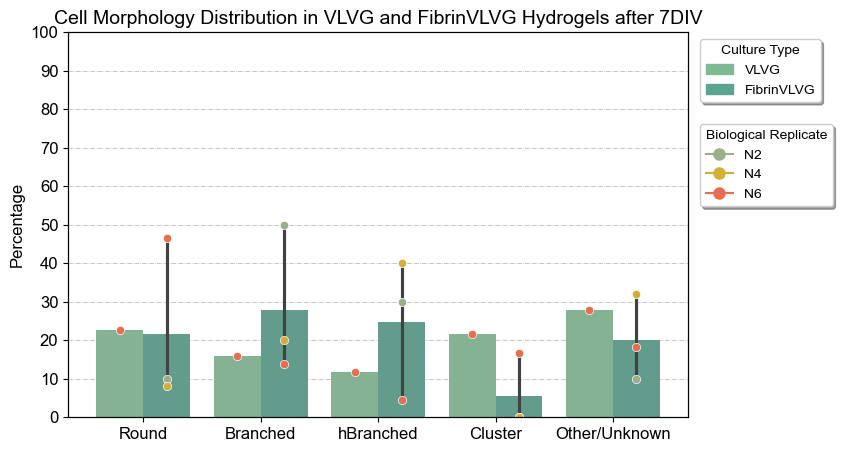

In [13]:
# Percentage of Morphology observations per type of VLVG hydrogel and by biological replicate

## Create figure and subplot
fig, ax = plt.subplots(figsize=(8,5))
ax.set_axisbelow(True)
plt.grid(visible=True, which='both', axis='y', linestyle='-.', linewidth=0.5, zorder= -1, ds='steps-mid')

## Set X Position of morphology labels
df_new_stats_VLVG['X Position'] = [morphology_labels.index(m) for m in df_new_stats_VLVG["Morphology Label"]]

## Plot mean data and variance
sns.barplot(data=df_new_stats_VLVG, 
            x="X Position", y = "Percentage", hue="Culture ID", 
            hue_order=['VLVG', 'FibrinVLVG'],
            palette=bars_palette, width=0.8)

## Create patches for legend
custom_legend = [
    Patch(facecolor=bars_palette[0], edgecolor=bars_palette[0], label='VLVG'),
    Patch(facecolor=bars_palette[1], edgecolor=bars_palette[1], label='FibrinVLVG')
]

## Plot each observation and create markers for legend
custom_markers = []
shift = {'VLVG': -0.2, 'FibrinVLVG': 0.2}
# shift_rep = [-0.05, 0, 0.05]

for c, rep in enumerate(sorted(df_new_stats_VLVG["Replicate"].unique())):
    df_partial = df_new_stats_VLVG[(df_new_stats_VLVG["Replicate"] == rep)]
    for gel in vlvg_cultures:
        if bool(len(df_partial[df_partial["Culture ID"] == gel])):
            data = df_partial[df_partial["Culture ID"] == gel]
            sns.scatterplot(data=data, x=data["X Position"]+shift[gel], y = "Percentage", color=markers_palette[c], legend=False, markers="o", zorder=2)
    custom_markers.append(Line2D([0], [0], marker='o', color=markers_palette[c], markerfacecolor=markers_palette[c], markersize=8, label=rep))

## Create legends
legend1 = ax.legend(handles=custom_legend, loc='upper right', title="Culture Type", fancybox=True, shadow=True, bbox_to_anchor=(1.225, 1))
ax2 = ax.twinx()
legend2 = ax2.legend(handles=custom_markers,loc='upper left', title="Biological Replicate", fancybox=True, shadow=True, bbox_to_anchor=(1.008, 0.78))
legend2._legend_box.align = "left"

## Titles and labels
plt.title("Cell Morphology Distribution in VLVG and FibrinVLVG Hydrogels after 7DIV", fontsize=14)
ax.set_xlabel("")
ax.set_xticks(ticks=[0,1,2,3,4], labels=morphology_labels, fontsize=12)
plt.ylim((0, 100))
y_ticks = np.arange(0,110,10)
ax.set_yticks(ticks=y_ticks,labels=list(y_ticks), fontsize=12)
ax2.set_yticks(ticks=[],labels=[])

# plt.set_ylabel(fontsize=16)

## Save and show graphic
plt.savefig('Images/E1_percentage_morphology.pdf', transparent=True, dpi=600, bbox_inches = 'tight')
plt.show()

/var/folders/ml/978gv1hs5yv185y4wyk_hfgw0000gn/T/ipykernel_65658/4247312902.py:12: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(data=df_new_stats_DoB,


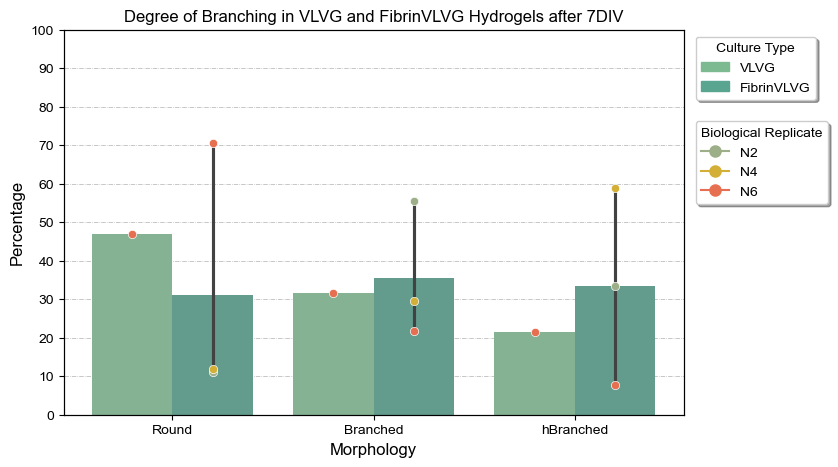

In [14]:
# Percentage of Morphology observations (degree of branching) per type of VLVG hydrogel and by biological replicate

## Create figure and subplot
fig, ax = plt.subplots(figsize=(8,5))
ax.set_axisbelow(True)
plt.grid(visible=True, which='both', axis='y', linestyle='-.', linewidth=0.5, zorder= -1, ds='steps-mid')

## Set X Position of morphology labels
df_new_stats_DoB['X Position'] = [morphology_DoB.index(m) for m in df_new_stats_DoB["Morphology Label"]]

## Plot mean data and variance
sns.barplot(data=df_new_stats_DoB, 
            x="X Position", y = "Percentage", hue="Culture ID",
            hue_order = ['VLVG', 'FibrinVLVG'],
            palette=bars_palette, width=0.8,
            errorbar='ci')

## Create patches for legend
custom_legend = [
    Patch(facecolor=bars_palette[0], edgecolor=bars_palette[0], label='VLVG'),
    Patch(facecolor=bars_palette[1], edgecolor=bars_palette[1], label='FibrinVLVG')
]

## Plot each observation and create markers for legend
custom_markers = []
shift = {'VLVG': -0.2, 'FibrinVLVG': 0.2}

for c, rep in enumerate(sorted(df_new_stats_DoB["Replicate"].unique())):
    df_partial = df_new_stats_DoB[(df_new_stats_DoB["Replicate"] == rep)]
    for gel in vlvg_cultures:
        if bool(len(df_partial[df_partial["Culture ID"] == gel])):
            data = df_partial[df_partial["Culture ID"] == gel]
            sns.scatterplot(data=data, x=data["X Position"]+shift[gel], y = "Percentage", color=markers_palette[c], legend=False, markers="o", zorder=2)
    custom_markers.append(Line2D([0], [0], marker='o', color=markers_palette[c], markerfacecolor=markers_palette[c], markersize=8, label=rep))

## Create legends
legend1 = ax.legend(handles=custom_legend, loc='upper right', title="Culture Type", fancybox=True, shadow=True, bbox_to_anchor=(1.225, 1))
ax2 = ax.twinx()
legend2 = ax2.legend(handles=custom_markers,loc='upper left', title="Biological Replicate", fancybox=True, shadow=True, bbox_to_anchor=(1.008, 0.78))
legend2._legend_box.align = "left"

## Titles and labels
plt.title("Degree of Branching in VLVG and FibrinVLVG Hydrogels after 7DIV")
ax.set_xlabel("Morphology")
plt.xticks(ticks=[0,1,2], labels=morphology_DoB)
y_ticks = np.arange(0,110,10)
ax.set_yticks(ticks=y_ticks,labels=list(y_ticks))
ax2.set_yticks(ticks=[],labels=[])

## Save and show graphic
plt.savefig('Images/E1_percentage_DoB.pdf', transparent=True)
plt.show()

#### T1: Difference on the mean number of clusters

In [28]:
cluter_other = df_new_stats_VLVG[(df_new_stats_VLVG['Morphology Label'] == 'Cluster')]
a = cluter_other[cluter_other['Culture ID'] == 'VLVG'].sum()['Percentage']

b = cluter_other[cluter_other['Culture ID'] == 'FibrinVLVG'].groupby('Replicate').sum(numeric_only=True).apply(lambda x:x)['Percentage']

a, b

(21.587301587301585,
 Replicate
 N2     0.000000
 N4     0.000000
 N6    16.730897
 Name: Percentage, dtype: float64)

In [27]:
from scipy.stats import ttest_ind

ttest_ind(a, b)

TtestResult(statistic=1.435398464389727, pvalue=0.2876560520864778, df=2.0)

#### T2: Differences DoB

In [37]:
cluter_other = df_new_stats_DoB[(df_new_stats_DoB['Morphology Label'] == 'Round')]
a = cluter_other[cluter_other['Culture ID'] == 'VLVG'].sum()['Percentage']

b = cluter_other[cluter_other['Culture ID'] == 'FibrinVLVG'].groupby('Replicate').sum(numeric_only=True).apply(lambda x:x)['Percentage']

ttest_ind(a, b)

# a, np.mean(b)

TtestResult(statistic=0.39932135673648905, pvalue=0.728262107532953, df=2.0)

In [30]:
cluter_other = df_new_stats_DoB[(df_new_stats_DoB['Morphology Label'] == 'Branched')]
a = cluter_other[cluter_other['Culture ID'] == 'VLVG'].sum()['Percentage']

b = cluter_other[cluter_other['Culture ID'] == 'FibrinVLVG'].groupby('Replicate').sum(numeric_only=True).apply(lambda x:x)['Percentage']

ttest_ind(a, b)

TtestResult(statistic=-0.5359869554496427, pvalue=0.64559947014733, df=2.0)

In [31]:
cluter_other = df_new_stats_VLVG[(df_new_stats_VLVG['Morphology Label'] == 'hBranched')]
a = cluter_other[cluter_other['Culture ID'] == 'VLVG'].sum()['Percentage']

b = cluter_other[cluter_other['Culture ID'] == 'FibrinVLVG'].groupby('Replicate').sum(numeric_only=True).apply(lambda x:x)['Percentage']

ttest_ind(a, b)

TtestResult(statistic=-0.6131422753738218, pvalue=0.6022197546078617, df=2.0)

In [46]:
from scipy.stats import ttest_ind

hbranched = df_new_stats_DoB[(df_new_stats_DoB['Morphology Label'] == 'hBranched')]
branched = df_new_stats_DoB[(df_new_stats_DoB['Morphology Label'] == 'Branched')]

a = hbranched[hbranched['Culture ID'] == 'FibrinVLVG'].groupby('Replicate').sum(numeric_only=True).apply(lambda x:x)['Percentage']

b = branched[branched['Culture ID'] == 'FibrinVLVG'].groupby('Replicate').sum(numeric_only=True).apply(lambda x:x)['Percentage']

ttest_rel(a, b)

TtestResult(statistic=-0.14018771400567084, pvalue=0.9013557857155374, df=2)

In [48]:
from scipy.stats import ttest_ind

branched = df_new_stats_DoB[(df_new_stats_DoB['Morphology Label'] == 'hBranched') | (df_new_stats_DoB['Morphology Label'] == 'Branched')]
round_c = df_new_stats_DoB[(df_new_stats_DoB['Morphology Label'] == 'Round')]

a = branched[branched['Culture ID'] == 'FibrinVLVG'].groupby('Replicate').sum(numeric_only=True).apply(lambda x:x)['Percentage']

b = round_c[round_c['Culture ID'] == 'FibrinVLVG'].groupby('Replicate').sum(numeric_only=True).apply(lambda x:x)['Percentage']

ttest_rel(a, b)

TtestResult(statistic=0.9566189573930137, pvalue=0.4397127015761363, df=2)

### Cell Identity

In [17]:
# Create dataframe with cell type statistics

## Allocate dataframe
vlvg_markers_stats = pd.DataFrame(index=df["File Name"].unique())

## Variables
binary_state = {"Positive": "+", "Negative": '-'}
main_markers = ['SOX9','GFAP']

## Ratio over all cells
for marker in main_markers:
    for marker_key, marker_value in binary_state.items():
        for gfp_key, gfp_value in binary_state.items():
            vlvg_markers_stats[f"{marker}{marker_value}DAPI+GFP{gfp_value}"] = df[(df[f"{marker} Label"] == marker_key) & 
                                                                                  (df["GFP Label"] == gfp_key)].value_counts("File Name")

## Ratio SOX9/GFAP
for sox9_key, sox9_value in binary_state.items():
    for gfap_key, gfap_value in binary_state.items():
        vlvg_markers_stats[f"SOX9{sox9_value}GFAP{gfap_value}DAPI+GFP+"] = df[(df["SOX9 Label"] == sox9_key) & 
                                                                            (df["GFAP Label"] == gfap_key) & 
                                                                            (df["GFP Label"] == "Positive")].value_counts("File Name")

## Ratio SOX9/GFAP per morphology labelling
for morph in morphology_DoB + ["Cluster"]:
    for sox9_key, sox9_value in binary_state.items():
        for gfap_key, gfap_value in binary_state.items():
            vlvg_markers_stats[f"{morph} SOX9{sox9_value}GFAP{gfap_value}DAPI+GFP+"] = df[(df["Morphology Label"] == morph) &
                                                                                        (df["SOX9 Label"] == sox9_key) & 
                                                                                        (df["GFAP Label"] == gfap_key) & 
                                                                                        (df["GFP Label"] == "Positive")].value_counts("File Name")

## Image ID and remove NaN
vlvg_markers_stats["Culture ID"] = [file_name.split(' ')[4] for file_name in vlvg_markers_stats.index]
vlvg_markers_stats["Replicate"] = [file_name.split(' ')[3] for file_name in vlvg_markers_stats.index]
df_markers_stats = vlvg_markers_stats.fillna(0)

## Show dataframe
vlvg_markers_stats.head(5)

,SOX9+DAPI+GFP+,SOX9+DAPI+GFP-,SOX9-DAPI+GFP+,SOX9-DAPI+GFP-,GFAP+DAPI+GFP+,GFAP+DAPI+GFP-,GFAP-DAPI+GFP+,GFAP-DAPI+GFP-,SOX9+GFAP+DAPI+GFP+,SOX9+GFAP-DAPI+GFP+,...,hBranched SOX9+GFAP+DAPI+GFP+,hBranched SOX9+GFAP-DAPI+GFP+,hBranched SOX9-GFAP+DAPI+GFP+,hBranched SOX9-GFAP-DAPI+GFP+,Cluster SOX9+GFAP+DAPI+GFP+,Cluster SOX9+GFAP-DAPI+GFP+,Cluster SOX9-GFAP+DAPI+GFP+,Cluster SOX9-GFAP-DAPI+GFP+,Culture ID,Replicate
E1 ActinGFP 8DIV N6 VLVG P1,29.0,1.0,NaN,NaN,24.0,NaN,5.0,1.0,24.0,5.0,...,1.0,NaN,NaN,NaN,13.0,NaN,NaN,NaN,VLVG,N6
E1 ActinGFP 7DIV N4 MVG P1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MVG,N4
E1 ActinGFP 8DIV N6 VLVG P3,5.0,4.0,1.0,4.0,5.0,1.0,1.0,7.0,5.0,NaN,...,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,VLVG,N6
E1 ActinGFP 7DIV N2 FibrinVLVG P1,5.0,NaN,4.0,1.0,7.0,NaN,2.0,1.0,5.0,NaN,...,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,FibrinVLVG,N2
E1 ActinGFP 7DIV N4 FibrinVLVG P1,15.0,NaN,3.0,7.0,14.0,NaN,4.0,7.0,13.0,2.0,...,9.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,FibrinVLVG,N4


In [15]:
# Import .csv file with cell instance labels
annotations_pdl_path = "/Users/Beatriz/Documents/Biomédica@IST/Mestrado/Tese/datasets_segmentation/E1WT7DIV__GFAP_SOX9_GFP_DAPI/annotations_pdl.csv"
pdl_markers_stats = pd.read_csv(annotations_pdl_path, delimiter=";", index_col=0) 

# Image ID and remove NaN
pdl_markers_stats["Culture ID"] = [file_name.split(' ')[4] for file_name in pdl_markers_stats.index]
pdl_markers_stats["Replicate"] = [file_name.split(' ')[3] for file_name in pdl_markers_stats.index]
pdl_markers_stats = pdl_markers_stats.fillna(0)

# Show dataframe
pdl_markers_stats

,DAPI+GFP+,SOX9+DAPI+GFP+,SOX9+GFAP+DAPI+GFP+,SOX9-GFAP+DAPI+GFP+,SOX9-DAPI+GFP+,GFAP+DAPI+GFP+,GFAP-DAPI+GFP+,Culture ID,Replicate
E1 ActinGFP 7DIV N4 PDL P1,295,221,140,16,74,156,139,PDL,N4
E1 ActinGFP 8DIV N6 PDL P1,75,69,61,3,6,64,11,PDL,N6
E1 ActinGFP 8DIV N6 PDL P2,40,29,12,1,11,13,27,PDL,N6
E1 ActinGFP 8DIV N6 PDL P3,69,32,11,2,37,13,56,PDL,N6
E1 ActinGFP 8DIV N6 PDL P4,39,30,19,0,9,19,20,PDL,N6


In [18]:
df_markers_stats = pd.concat([vlvg_markers_stats, pdl_markers_stats]).fillna(0)
df_markers_stats.head(5)

,SOX9+DAPI+GFP+,SOX9+DAPI+GFP-,SOX9-DAPI+GFP+,SOX9-DAPI+GFP-,GFAP+DAPI+GFP+,GFAP+DAPI+GFP-,GFAP-DAPI+GFP+,GFAP-DAPI+GFP-,SOX9+GFAP+DAPI+GFP+,SOX9+GFAP-DAPI+GFP+,...,hBranched SOX9+GFAP-DAPI+GFP+,hBranched SOX9-GFAP+DAPI+GFP+,hBranched SOX9-GFAP-DAPI+GFP+,Cluster SOX9+GFAP+DAPI+GFP+,Cluster SOX9+GFAP-DAPI+GFP+,Cluster SOX9-GFAP+DAPI+GFP+,Cluster SOX9-GFAP-DAPI+GFP+,Culture ID,Replicate,DAPI+GFP+
E1 ActinGFP 8DIV N6 VLVG P1,29.0,1.0,0.0,0.0,24.0,0.0,5.0,1.0,24.0,5.0,...,0.0,0.0,0.0,13.0,0.0,0.0,0.0,VLVG,N6,0.0
E1 ActinGFP 7DIV N4 MVG P1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MVG,N4,0.0
E1 ActinGFP 8DIV N6 VLVG P3,5.0,4.0,1.0,4.0,5.0,1.0,1.0,7.0,5.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,VLVG,N6,0.0
E1 ActinGFP 7DIV N2 FibrinVLVG P1,5.0,0.0,4.0,1.0,7.0,0.0,2.0,1.0,5.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,FibrinVLVG,N2,0.0
E1 ActinGFP 7DIV N4 FibrinVLVG P1,15.0,0.0,3.0,7.0,14.0,0.0,4.0,7.0,13.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,FibrinVLVG,N4,0.0


In [19]:
df_markers_stats["GFAP-DAPI+GFP+"]

E1 ActinGFP 8DIV N6 VLVG P1            5.0
E1 ActinGFP 7DIV N4 MVG P1             0.0
E1 ActinGFP 8DIV N6 VLVG P3            1.0
E1 ActinGFP 7DIV N2 FibrinVLVG P1      2.0
E1 ActinGFP 7DIV N4 FibrinVLVG P1      4.0
E1 ActinGFP 8DIV N6 FibrinVLVG P3     11.0
E1 ActinGFP 8DIV N6 FibrinVLVG P1     20.0
E1 ActinGFP 8DIV N6 VLVG P2            1.0
E1 ActinGFP 8DIV N6 FibrinVLVG P2     20.0
E1 ActinGFP 7DIV N2 MVG P1             0.0
E1 ActinGFP 7DIV N4 PDL P1           139.0
E1 ActinGFP 8DIV N6 PDL P1            11.0
E1 ActinGFP 8DIV N6 PDL P2            27.0
E1 ActinGFP 8DIV N6 PDL P3            56.0
E1 ActinGFP 8DIV N6 PDL P4            20.0
Name: GFAP-DAPI+GFP+, dtype: float64

In [20]:
# Create dataframe with SOX9, GFAP and SOX9/GFAP ratios

## Allocate dataframe
df_ratios = pd.DataFrame(index=df_markers_stats.index)

## Percentage of SOX9+ cells in alive (GFP producing) cells
df_ratios["SOX9+/DAPI+GFP+"] = df_markers_stats["SOX9+DAPI+GFP+"]/(df_markers_stats["SOX9+DAPI+GFP+"]+df_markers_stats["SOX9-DAPI+GFP+"])

## Percentage of GFAP+ cells in alive (GFP producing) cells
df_ratios["GFAP+/DAPI+GFP+"] = df_markers_stats["GFAP+DAPI+GFP+"]/(df_markers_stats["GFAP+DAPI+GFP+"]+df_markers_stats["GFAP-DAPI+GFP+"])

## Percentage of GFAP+ cells in SOX9+ cells
df_ratios["GFAP+/SOX9+"] = df_markers_stats["SOX9+GFAP+DAPI+GFP+"]/df_markers_stats["SOX9+DAPI+GFP+"]
df_ratios["SOX9-/GFAP+"] = df_markers_stats["SOX9-GFAP+DAPI+GFP+"]/df_markers_stats["GFAP+DAPI+GFP+"]

## Image ID and remove NaN
df_ratios["Culture ID"] = [file_name.split(' ')[4] for file_name in df_ratios.index]
df_ratios["Replicate"] = [file_name.split(' ')[3] for file_name in df_ratios.index]
df_ratios = df_ratios.fillna(0)

## Filter cultures: VLVG, FibrinVLVG and PDL and show dataframe
cultures = vlvg_cultures + ['PDL']
df_ratios_filtered = df_ratios[df_ratios["Culture ID"].isin(cultures)]
df_ratios_filtered

,SOX9+/DAPI+GFP+,GFAP+/DAPI+GFP+,GFAP+/SOX9+,SOX9-/GFAP+,Culture ID,Replicate
E1 ActinGFP 8DIV N6 VLVG P1,1.000000,0.827586,0.827586,0.000000,VLVG,N6
E1 ActinGFP 8DIV N6 VLVG P3,0.833333,0.833333,1.000000,0.000000,VLVG,N6
E1 ActinGFP 7DIV N2 FibrinVLVG P1,0.555556,0.777778,1.000000,0.285714,FibrinVLVG,N2
E1 ActinGFP 7DIV N4 FibrinVLVG P1,0.833333,0.777778,0.866667,0.071429,FibrinVLVG,N4
E1 ActinGFP 8DIV N6 FibrinVLVG P3,0.782609,0.521739,0.611111,0.083333,FibrinVLVG,N6
E1 ActinGFP 8DIV N6 FibrinVLVG P1,0.909091,0.545455,0.600000,0.000000,FibrinVLVG,N6
E1 ActinGFP 8DIV N6 VLVG P2,1.000000,0.750000,0.750000,0.000000,VLVG,N6
E1 ActinGFP 8DIV N6 FibrinVLVG P2,0.902439,0.512195,0.567568,0.000000,FibrinVLVG,N6
E1 ActinGFP 7DIV N4 PDL P1,0.749153,0.528814,0.633484,0.102564,PDL,N4
E1 ActinGFP 8DIV N6 PDL P1,0.920000,0.853333,0.884058,0.046875,PDL,N6


In [21]:
# Mean of biological replicates
df_ratios_filtered_mean = df_ratios_filtered.groupby(["Culture ID", "Replicate"]).mean(numeric_only=True)

## Reset index
df_new_ratios_filtered = df_ratios_filtered_mean.reset_index()
df_new_ratios_filtered.groupby("Culture ID").apply(lambda x: x)

/var/folders/ml/978gv1hs5yv185y4wyk_hfgw0000gn/T/ipykernel_65658/2219581460.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_new_ratios_filtered.groupby("Culture ID").apply(lambda x: x)


Culture ID Replicate  SOX9+/DAPI+GFP+  GFAP+/DAPI+GFP+  \
Culture ID                                                             
FibrinVLVG 0  FibrinVLVG        N2         0.555556         0.777778   
           1  FibrinVLVG        N4         0.833333         0.777778   
           2  FibrinVLVG        N6         0.864713         0.526463   
PDL        3         PDL        N4         0.749153         0.528814   
           4         PDL        N6         0.719500         0.463480   
VLVG       5        VLVG        N6         0.944444         0.803640   

              GFAP+/SOX9+  SOX9-/GFAP+  
Culture ID                              
FibrinVLVG 0     1.000000     0.285714  
           1     0.866667     0.071429  
           2     0.592893     0.027778  
PDL        3     0.633484     0.102564  
           4     0.568734     0.069411  
VLVG       5     0.859195     0.000000

/var/folders/ml/978gv1hs5yv185y4wyk_hfgw0000gn/T/ipykernel_65658/2892399471.py:12: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.barplot(data=df_new_ratios_filtered, x=x_pos, y=ratio, hue="Culture ID", hue_order= ['VLVG', 'FibrinVLVG', 'PDL'], palette=bars_palette, errorbar='ci', width=0.8, estimator='mean')
/var/folders/ml/978gv1hs5yv185y4wyk_hfgw0000gn/T/ipykernel_65658/2892399471.py:12: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.barplot(data=df_new_ratios_filtered, x=x_pos, y=ratio, hue="Culture ID", hue_order= ['VLVG', 'FibrinVLVG', 'PDL'], palette=bars_palette, errorbar='ci', width=0.8, estimator='mean')
/var/folders/ml/978gv1hs5yv185y4wyk_hfgw0000gn/T/ipykernel_65658/2892399471.py:12: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.barplot(data=df_new_ratios_filtered, x=x_pos, y=ratio, hue="Culture ID", hue_order= ['VLV

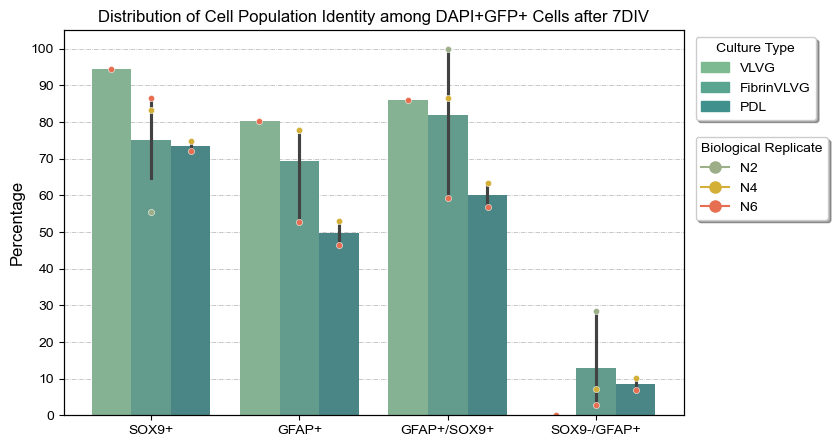

In [26]:
fig, ax = plt.subplots(figsize=(8,5))
ax.set_axisbelow(True)
plt.grid(visible=True, which='both', axis='y', linestyle='-.', linewidth=0.5, zorder= -1, ds='steps-mid')

## Variables
ratios = ["SOX9+/DAPI+GFP+", "GFAP+/DAPI+GFP+", "GFAP+/SOX9+", "SOX9-/GFAP+"]
s = 0.27
shift = {'VLVG': -s, 'FibrinVLVG': 0, 'PDL': s}

## Plot the ratios
for x_pos, ratio in enumerate(ratios):
    sns.barplot(data=df_new_ratios_filtered, x=x_pos, y=ratio, hue="Culture ID", hue_order= ['VLVG', 'FibrinVLVG', 'PDL'], palette=bars_palette, errorbar='ci', width=0.8, estimator='mean')
    for c, rep in enumerate(sorted(df_new_ratios_filtered["Replicate"].unique())):
        df_partial = df_new_ratios_filtered[(df_new_ratios_filtered["Replicate"] == rep)]
        for culture in cultures:
            if bool(len(df_partial[df_partial["Culture ID"] == culture])):
                data = df_partial[df_partial["Culture ID"] == culture]
                sns.scatterplot(data=data, x=x_pos+shift[culture], y = ratio, color=markers_palette[c], legend=False, markers="o",s=20, zorder =2)

# Create legends
custom_legend = [
    Patch(facecolor=bars_palette[0], edgecolor=bars_palette[0], label='VLVG'),
    Patch(facecolor=bars_palette[1], edgecolor=bars_palette[1], label='FibrinVLVG'),
    Patch(facecolor=bars_palette[2], edgecolor=bars_palette[2], label='PDL')
]
custom_markers = []
for c, rep in enumerate(sorted(df_new_ratios_filtered["Replicate"].unique())):
    custom_markers.append(Line2D([0], [0], marker='o', color=markers_palette[c], markerfacecolor=markers_palette[c], markersize=8, label=rep))

legend1 = ax.legend(handles=custom_legend, loc='upper right', title="Culture Type", fancybox=True, shadow=True, bbox_to_anchor=(1.225, 1))
ax2 = ax.twinx()
legend2 = ax2.legend(handles=custom_markers,loc='upper left', title="Biological Replicate", fancybox=True, shadow=True, bbox_to_anchor=(1.008, 0.74), )
legend2._legend_box.align = "left"


## Titles and labels
plt.title("Distribution of Cell Population Identity among DAPI+GFP+ Cells after 7DIV")
ax.set_ylabel("Percentage")
plt.xticks(ticks=np.arange(len(ratios)), labels=ratios)
y_ticks = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
ax.set_xticks(ticks=np.arange(0,4,1),labels=["SOX9+", "GFAP+", "GFAP+/SOX9+", "SOX9-/GFAP+"])
ax.set_yticks(ticks=y_ticks,labels=list(np.arange(0, 101, 10)))
ax2.set_yticks(ticks=[],labels=[])


## Save and show graphic
plt.savefig('Images/E1_ratio_sox9gfap.pdf', transparent=True)
plt.show()

In [22]:
# fig, ax = plt.subplots(figsize=(8,5))
# ax.set_axisbelow(True)
# plt.grid(visible=True, which='both', axis='y', linestyle='-.', linewidth=0.5, zorder= -1, ds='steps-mid')

# ## Variables
# ratios = ["SOX9+/DAPI+GFP+", "GFAP+/DAPI+GFP+", "GFAP+/SOX9+", "SOX9-/GFAP+"]
# s = 0.27
# shift = {'VLVG': -s, 'FibrinVLVG': 0, 'PDL': s}

# ## Plot the ratios
# for x_pos, ratio in enumerate(ratios):
#     # sns.barplot(data=df_ratios_filtered, x=x_pos, y=ratio, hue="Culture ID", palette=bars_palette, width=0.8, errorbar=None, estimator='mean')
#     sns.boxplot(data=df_new_ratios_filtered, x=x_pos, y=ratio, hue="Culture ID", hue_order= ['VLVG', 'FibrinVLVG', 'PDL'], palette=bars_palette, linewidth=1, showfliers=True, zorder=0, showmeans=True)
#     for c, rep in enumerate(sorted(df_new_ratios_filtered["Replicate"].unique())):
#         df_partial = df_new_ratios_filtered[(df_new_ratios_filtered["Replicate"] == rep)]
#         for culture in cultures:
#             if bool(len(df_partial[df_partial["Culture ID"] == culture])):
#                 data = df_partial[df_partial["Culture ID"] == culture]
#                 sns.scatterplot(data=data, x=x_pos+shift[culture], y = ratio, color=markers_palette[c], legend=False, markers="o",s=10)

# # Create legends
# custom_legend = [
#     Patch(facecolor=bars_palette[0], edgecolor=bars_palette[0], label='VLVG'),
#     Patch(facecolor=bars_palette[1], edgecolor=bars_palette[1], label='FibrinVLVG'),
#     Patch(facecolor=bars_palette[2], edgecolor=bars_palette[2], label='PDL')
# ]
# custom_markers = []
# for c, rep in enumerate(sorted(df_new_ratios_filtered["Replicate"].unique())):
#     custom_markers.append(Line2D([0], [0], marker='o', color=markers_palette[c], markerfacecolor=markers_palette[c], label=rep))

# legend1 = ax.legend(handles=custom_legend, loc='upper right', title="Culture Type", fancybox=True, shadow=True, bbox_to_anchor=(1.225, 1))
# ax2 = ax.twinx()
# legend2 = ax2.legend(handles=custom_markers,loc='upper left', title="Replicates", fancybox=True, shadow=True, bbox_to_anchor=(1.008, 0.74))


# ## Titles and labels
# plt.title("Ratio of SOX9+, GFAP+ and SOX9+/GFAP+ per Alive (DAPI+GFP+) Cells")
# plt.xlabel("Metric")
# ax.set_xlabel("Metric")
# ax.set_ylabel("Ratio")
# plt.xticks(ticks=np.arange(len(ratios)), labels=ratios)
# y_ticks = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
# ax.set_yticks(ticks=y_ticks,labels=list(y_ticks))
# ax2.set_yticks(ticks=[],labels=[])

# ## Save and show graphic
# plt.savefig('Images/E1_ratio_sox9gfap.png', transparent=True)
# plt.show()

#

## Statistical Significance of the Results

In [22]:
import numpy as np
from scipy.stats import ttest_ind

In [35]:
df_new_stats_DoB

,Culture ID,Replicate,Morphology Label,Count,Percentage,X Position
0,FibrinVLVG,N2,Branched,5.000000,55.555556,1
1,FibrinVLVG,N2,Round,1.000000,11.111111,0
2,FibrinVLVG,N2,hBranched,3.000000,33.333333,2
3,FibrinVLVG,N4,Branched,5.000000,29.411765,1
4,FibrinVLVG,N4,Round,2.000000,11.764706,0
5,FibrinVLVG,N4,hBranched,10.000000,58.823529,2
6,FibrinVLVG,N6,Branched,5.000000,21.679928,1
7,FibrinVLVG,N6,Round,18.666667,70.562186,0
8,FibrinVLVG,N6,hBranched,1.666667,7.757886,2
9,VLVG,N6,Branched,2.666667,31.501832,1


### T1: FibrinVLVG and VLVG gels produce same degrees of branching

In [71]:
vlvg = df_new_stats_DoB[df_new_stats_DoB['Culture ID'] == 'VLVG'] 
vlvg_rb = sum(vlvg['X Position'] * vlvg['Percentage'])
vlvg_rb

74.72527472527472

In [72]:
fibrinvlvg = df_new_stats_DoB[df_new_stats_DoB['Culture ID'] == 'FibrinVLVG'] 
fibrinvlvg['Ponderated'] = fibrinvlvg['X Position'] * fibrinvlvg['Percentage']
fibrinvlvg_rb = fibrinvlvg.groupby('Replicate')['Ponderated'].sum()
fibrinvlvg_rb

/var/folders/ml/978gv1hs5yv185y4wyk_hfgw0000gn/T/ipykernel_4510/1064663257.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fibrinvlvg['Ponderated'] = fibrinvlvg['X Position'] * fibrinvlvg['Percentage']


Replicate
N2    122.222222
N4    147.058824
N6     37.195700
Name: Ponderated, dtype: float64

In [73]:
ttest_ind(vlvg_rb, fibrinvlvg_rb)

TtestResult(statistic=-0.4123686774693468, pvalue=0.7200689925367443, df=2.0)

The p-value is higher than 0.05 therefore the null hypothesis is rejected. 

Thus, FibrinVLVG and VLVG have statistically significant different degress of branching (p = 0.72)

### T2: Percentage of Fibrin correlates with expression of GFAP

In [79]:
from scipy.stats import spearmanr, rankdata

df_new_ratios_filtered_gels = df_new_ratios_filtered[df_new_ratios_filtered['Culture ID'] != 'PDL']
df_new_ratios_filtered_gels

,Culture ID,Replicate,SOX9+/DAPI+GFP+,GFAP+/DAPI+GFP+,GFAP+/SOX9+,SOX9-/GFAP+
0,FibrinVLVG,N2,0.555556,0.777778,1.000000,0.285714
1,FibrinVLVG,N4,0.833333,0.777778,0.866667,0.071429
2,FibrinVLVG,N6,0.864713,0.526463,0.592893,0.027778
5,VLVG,N6,0.944444,0.803640,0.859195,0.000000


In [90]:
rank = pd.DataFrame(columns=['Rank ID', 'Rank GFAP/SOX9'])

rank_id = {'VLVG':0, 'FibrinVLVG':1}

rank['Rank ID'] = [rank_id[key] for key in df_new_ratios_filtered_gels['Culture ID']]
rank['Rank GFAP/SOX9'] = rankdata(df_new_ratios_filtered_gels['GFAP+/SOX9+'])
rank['Rank GFAP'] = rankdata(df_new_ratios_filtered_gels['GFAP+/DAPI+GFP+'])

In [91]:
spearmanr(rank).pvalue

array([[0.        , 0.74180111, 0.18350342],
       [0.74180111, 0.        , 0.68377223],
       [0.18350342, 0.68377223, 0.        ]])

p-value is in every correlation higher than 0.05, thus there is no statistical significance on the impact of fibrin in the expression of GFAP in astrocytes (p=0.74), or in the impact of fibrin in the general expression of GFAP (p=0.18).

### T3: Impact of hydrogels on GFAP/SOX9

In [20]:
df_new_ratios_filtered

,Culture ID,Replicate,SOX9+/DAPI+GFP+,GFAP+/DAPI+GFP+,GFAP+/SOX9+,SOX9-/GFAP+
0,FibrinVLVG,N2,0.555556,0.777778,1.000000,0.285714
1,FibrinVLVG,N4,0.833333,0.777778,0.866667,0.071429
2,FibrinVLVG,N6,0.864713,0.526463,0.592893,0.027778
3,PDL,N4,0.749153,0.528814,0.633484,0.102564
4,PDL,N6,0.719500,0.463480,0.568734,0.069411
5,VLVG,N6,0.944444,0.803640,0.859195,0.000000


In [60]:
df_new_ratios_filtered[df_new_ratios_filtered['Culture ID'].isin(["FibrinVLVG", "VLVG"])]['GFAP+/SOX9+']

0    1.000000
1    0.866667
2    0.592893
5    0.859195
Name: GFAP+/SOX9+, dtype: float64

In [64]:
from scipy.stats import ttest_rel

ttest_ind(df_new_ratios_filtered[df_new_ratios_filtered['Culture ID'] == 'PDL']['GFAP+/SOX9+'], df_new_ratios_filtered[df_new_ratios_filtered['Culture ID'].isin(["FibrinVLVG", "VLVG"])]['GFAP+/SOX9+'])



TtestResult(statistic=-1.7653797468356631, pvalue=0.1522579738229621, df=4.0)

In [56]:
df_new_ratios_filtered

,Culture ID,Replicate,SOX9+/DAPI+GFP+,GFAP+/DAPI+GFP+,GFAP+/SOX9+,SOX9-/GFAP+
0,FibrinVLVG,N2,0.555556,0.777778,1.000000,0.285714
1,FibrinVLVG,N4,0.833333,0.777778,0.866667,0.071429
2,FibrinVLVG,N6,0.864713,0.526463,0.592893,0.027778
3,PDL,N4,0.749153,0.528814,0.633484,0.102564
4,PDL,N6,0.719500,0.463480,0.568734,0.069411
5,VLVG,N6,0.944444,0.803640,0.859195,0.000000


In [58]:
(df_new_ratios_filtered['SOX9+/DAPI+GFP+'] - df_new_ratios_filtered['GFAP+/DAPI+GFP+']).mean()

0.13145782078987037

### Sedimentation Hypothesis

In [4]:
import numpy as np
import pandas as pd

In [3]:
sedimentation = pd.read_csv("/Users/Beatriz/Documents/Biomédica@IST/Mestrado/Tese/Pipeline-for-Morphology-Labeling/Notebooks/Data/counting_sedimentation.csv", index_col=0)
sedimentation

,I,II,III
MVG,69,80,73
VLVG,324,296,285
FibrinVLVG,113,95,118


/var/folders/ml/978gv1hs5yv185y4wyk_hfgw0000gn/T/ipykernel_50840/2284382300.py:6: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.barplot(sedimentation.transpose(), palette=bars_palette, zorder=2)
/var/folders/ml/978gv1hs5yv185y4wyk_hfgw0000gn/T/ipykernel_50840/2284382300.py:8: UserWarning: 
The markers list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(sedimentation, zorder=2, legend=False, markers="X",s=20 , palette='mako')


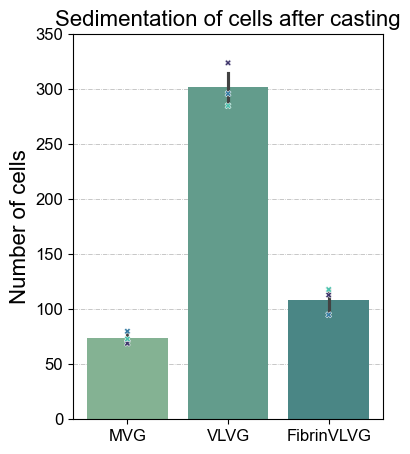

In [7]:
plt.rcParams['font.size'] = 24

fig, ax = plt.subplots(figsize=(4,5))
plt.grid(visible=True, which='both', axis='y', linestyle='-.', linewidth=0.5, zorder= -1, ds='steps-mid')

sns.barplot(sedimentation.transpose(), palette=bars_palette, zorder=2)
# sns.set_palette(["yellow"])
sns.scatterplot(sedimentation, zorder=2, legend=False, markers="X",s=20 , palette='mako')
plt.ylim((0,350))
plt.title("Sedimentation of cells after casting", fontsize=16)
plt.ylabel("Number of cells", fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.savefig('Images/sedimnetation.pdf', transparent=True)